Now, we want to use $fft$ (Fast Fourier Transform )to get $C_k$. since using midpoint rule to find $C_k$ cause high computing overhead\
\
By this way, we can get these coefficient faster. (The time complexity is $O(nlogn)$ )\
\
In order to achieve the purpose, we need to make the function periodic.
\
\
Define the function $f(x)=\frac{1}{1+10x^2}, $

Let $F(\theta) = \sum_{k=0}^{N} C_k \cos (k\theta)$ , $0 \leq \theta \leq 2\pi$
$\; \;$where $\;F(\theta) = \begin{equation}  
\left\{  
             \begin{array}{**lr**}  
             f(\cos(\theta)),\; if \;0 \leq \theta \leq \pi&  \\  
             f(\cos(2 \pi - \theta)),\; if \; \pi \leq \theta \leq 2 \pi &    
             \end{array}  
\right.  
\end{equation} $
\
\
Apply fft, and we get the coeffient!(need to adjust)\
\
The following code is cover one dimensional case

In [18]:
import numpy as np
import matplotlib.pyplot as plt

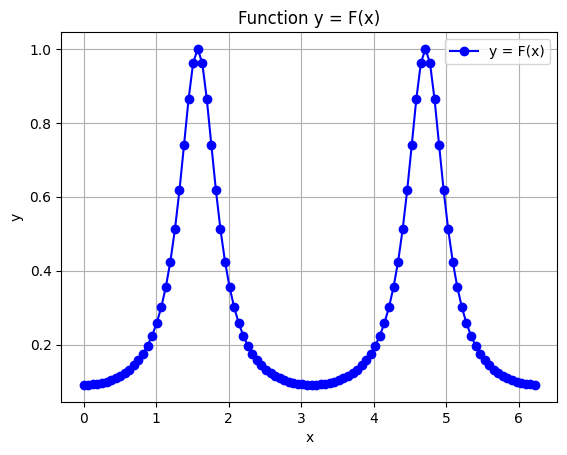

In [19]:
def F(theta):
    result = np.where(theta <= np.pi, 1/(1+10*np.cos(theta)**2), 1/(1+10*np.cos(2*np.pi-theta)**2))
    return result

N = 100
x = np.arange(0, 2*np.pi, 2*np.pi/N)

y = F(x)
plt.plot(x, y, marker='o', linestyle='-', color='b', label='y = F(x)')
plt.title('Function y = F(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
y_fft = np.fft.fft(y)
y_fft[0] = y_fft[0] / N 
y_fft[1:] = y_fft[1:] / N * 2

In [20]:
def midpoint_integration(f, N, d, x):
    # grid
    delta = (x[:, 1] - x[:, 0]) / N

    # midpoint
    midpoints = [np.linspace(x[i, 0] + delta[i] / 2, x[i, 1] - delta[i] / 2, N) for i in range(d)]

    # meshgrid
    mesh = np.meshgrid(*midpoints)
    points = np.vstack([m.flatten() for m in mesh]).T

    # value of midpoint
    if d == 1:
        function_values = np.array([f(point) for point in points])
    elif d == 2:
        function_values = np.array([f(point[0], point[1]) for point in points])
    elif d == 3:
        function_values = np.array([f(point[0], point[1], point[2]) for point in points])
    # calculate volume
    volume_element = np.prod(delta)

    # calculate integral
    integral = np.sum(function_values) * volume_element

    return integral

def function(x):
    return 1/(1 + 10*np.sum(x**2))

d = 1
x = np.array([[0, np.pi]])
k = range(0, 10, 1)
C_k = []
print("Result by using midpoint rule")
for i in k:    
    def function_chebyshev_1(theta):
        return function(np.cos(theta))* np.cos(i*theta)
    def function_chebyshev_2(theta):
        return np.cos(i*theta)**2
    inner_product_1 = midpoint_integration(function_chebyshev_1, 1000, d, x)
    inner_product_2 = midpoint_integration(function_chebyshev_2, 1000, d, x)
    C_k.append(inner_product_1/inner_product_2)
    print(" Index = " , i , ':', inner_product_1/inner_product_2)


Result by using midpoint rule
 Index =  0 : 0.30151134457776363
 Index =  1 : 0.0
 Index =  2 : -0.32362722698663277
 Index =  3 : 0.0
 Index =  4 : 0.17368265561239118
 Index =  5 : -2.842170943040401e-17
 Index =  6 : -0.0932111464831062
 Index =  7 : 1.4210854715202004e-17
 Index =  8 : 0.05002409594706375
 Index =  9 : -4.263256414560601e-17


In [21]:
print("Result by usnig fft")
print(np.real(y_fft[0:10]))

Result by usnig fft
[ 3.01511345e-01 -7.58003910e-17 -3.23627227e-01  1.30063786e-16
  1.73682656e-01 -1.03742504e-16 -9.32111465e-02  8.16398715e-17
  5.00240959e-02 -6.25493178e-17]


The following code is shown two dimensional case : $f(x, y) = \frac{1}{10+x^2+y^2}$\
\
Let $F(\theta_1, \theta_2) = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1} C_{i,j} \cos(i \theta_1) \cos(j \theta_2)$
$\; \;$where $\;F(\theta_1, \theta_2) = \begin{equation}  
\left\{  
             \begin{array}{**lr**}  
             f(\cos(\theta_1, \theta_2)),\; if \;0 \leq \theta_1, \theta_2\ \leq \pi&  \\  
             f(\cos(\theta_1, 2\pi - \theta_2)),\; if \;0 \leq \theta_1 \leq \pi , \pi \leq \theta_2 \leq 2 \pi &  \\    
             f(\cos(2\pi - \theta_1, \theta_2)),\; if \;\pi \leq \theta_1 \leq 2 \pi,  0 \leq \theta_2 \leq \pi&  \\ 
             f(\cos(2\pi-\theta_1, 2\pi-\theta_2)),\; if \;\pi \leq \theta_1, \theta_2\ \leq 2\pi&  \\ 
             \end{array}  
\right.  
\end{equation} $



In [22]:
def f(x, y):
    return 1/(10+x**2+y**2)
    
d1 = 1
x1 = np.array([[0, np.pi]])
d2 = 2
x2 = np.array([[0, np.pi], [0, np.pi]]) 
k = range(0, 4, 1)
C_kl = []
print("Result by using midpoint rule")
for i in k:    
    for j in k:
        def function_chebyshev_1(theta1, theta2):
            return f(np.cos(theta1), np.cos(theta2))*np.cos(i*theta1)*np.cos(j*theta2)
        def function_chebyshev_2(theta):
            return np.cos(i*theta)**2
        def function_chebyshev_3(theta):
            return np.cos(j*theta)**2
        inner_product_1 = midpoint_integration(function_chebyshev_1, 200, d2, x2)
        inner_product_2 = midpoint_integration(function_chebyshev_2, 100, d1, x1)
        inner_product_3 = midpoint_integration(function_chebyshev_3, 100, d1, x1)
        C_kl.append(inner_product_1/(inner_product_2*inner_product_3))
        print(" Index = " , i , j,  ':', inner_product_1/(inner_product_2*inner_product_3))

Result by using midpoint rule
 Index =  0 0 : 0.0910977978231593
 Index =  0 1 : -5.6843418860808e-18
 Index =  0 2 : -0.004151552109504897
 Index =  0 3 : -5.684341886080799e-18
 Index =  1 0 : -3.219646771412953e-18
 Index =  1 1 : -2.6645352591003745e-19
 Index =  1 2 : 3.5527136788005e-19
 Index =  1 3 : 0.0
 Index =  2 0 : -0.0041515521095049
 Index =  2 1 : 1.77635683940025e-19
 Index =  2 2 : 0.0003780009915228202
 Index =  2 3 : 3.552713678800499e-19
 Index =  3 0 : -4.873879078104435e-18
 Index =  3 1 : 2.4424906541753426e-19
 Index =  3 2 : 1.9984014443252808e-19
 Index =  3 3 : -5.329070518200747e-19


In [23]:
def F(theta1, theta2):
    result = np.zeros_like(theta1)  # Initialize result array
    
    mask1 = (theta1 < np.pi) & (theta2 < np.pi)
    result[mask1] = f(np.cos(theta1[mask1]), np.cos(theta2[mask1]))
    
    mask2 = (theta1 >= np.pi) & (theta2 < np.pi)
    result[mask2] = f(np.cos(2 * np.pi - theta1[mask2]), np.cos(theta2[mask2]))
    
    mask3 = (theta1 < np.pi) & (theta2 >= np.pi)
    result[mask3] = f(np.cos(theta1[mask3]), np.cos(2 * np.pi - theta2[mask3]))
    
    mask4 = (theta1 >= np.pi) & (theta2 >= np.pi)
    result[mask4] = f(np.cos(2 * np.pi - theta1[mask4]), np.cos(2 * np.pi - theta2[mask4]))
    
    return result

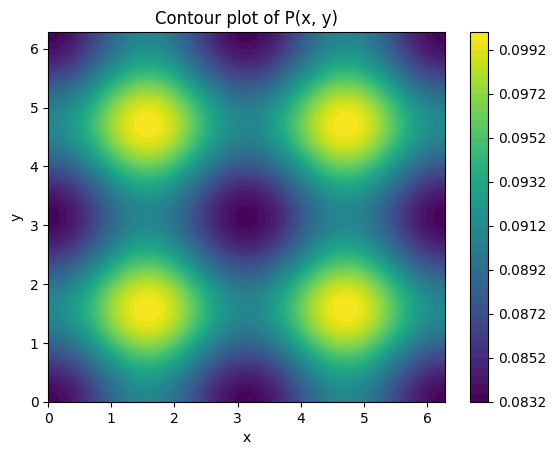

In [24]:
xx = np.linspace(0, 2 * np.pi, 500)
yy= np.linspace(0, 2 * np.pi, 500)
xx, yy = np.meshgrid(xx, yy)

z = F(xx, yy)
contour = plt.contourf(xx, yy, z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour plot of P(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

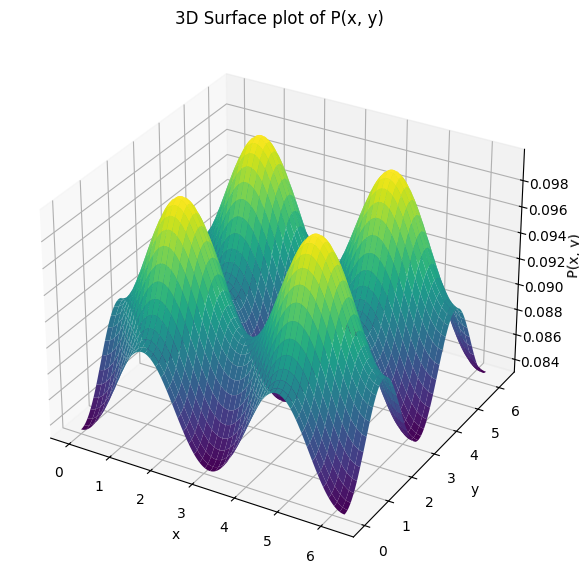

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap='viridis')
ax.set_title('3D Surface plot of P(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x, y)')
plt.show()

In [41]:
N = 100
x = np.arange(0, 2*np.pi, 2*np.pi/N)
y = np.arange(0, 2*np.pi, 2*np.pi/N)
X, Y = np.meshgrid(x, y)
data = F(X, Y) 
fft2d = np.real(np.fft.fft2(data)) / N**2

print("Result by usnig fft")
# print(fft2d[0, 0])
print(fft2d[0, 0], fft2d[0, 1:31]*2)

Result by usnig fft
0.0910977978231593 [-1.69265512e-18 -4.15155211e-03  5.93359052e-19  9.46961804e-05
  6.80054733e-19 -2.16223248e-06  6.99773760e-19  4.94217581e-08
  3.65489475e-19 -1.13077742e-09 -4.53799453e-19  2.58985723e-11
  9.52112811e-20 -5.93758719e-13  1.13956625e-19  1.36270472e-14
 -1.51259882e-19 -3.13807313e-16 -3.19260790e-19  6.21724894e-18
 -3.97660455e-19  8.96438172e-19  4.56037107e-20 -2.29216780e-19
 -3.21964677e-19 -1.10391942e-18  4.50329943e-19  7.04164635e-20
  1.17749858e-18 -5.08001570e-19]


We can observe that result of two ways are matched and using fft can reduce the overhead